In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

In [2]:
# 必要なライブラリ等のインポート
from sklearn.datasets import load_breast_cancer
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 決定木クラスの初期化
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# k分割交差検証の実行
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)

# 結果の表示
print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}+-{:.3f}'.format(scores.mean(), scores.std()))

Cross validation scores: [0.904 0.913 0.956 0.938 0.956]
Cross validation scores: 0.933+-0.021


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
model = LogisticRegression(random_state=0)
scores = cross_val_score(model, cancer.data, cancer.target, cv=5)

print('Cross validation scores:{}'.format(scores))
print('Cross validation scores:{:.2f}+-{:.2f}'.format(scores.mean(), scores.std()))

Cross validation scores:[0.93  0.939 0.973 0.947 0.965]
Cross validation scores:0.95+-0.02


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

ベストスコア:0.91
その時のパラメータ(gamma, C):(0.001, 1.0)


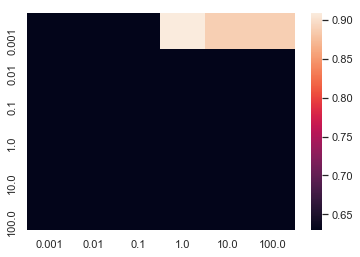

In [4]:
# インポート
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける 
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify = cancer.target,
                                                    random_state=0)

# ハイパーパラメータのすべての組み合わせでモデルを構築・検証
scores = {}
for gamma in np.logspace(-3, 2, num=6):
    for C in np.logspace(-3, 2, num=6):
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train,y_train)
        scores[(gamma, C)] = svm.score(X_test, y_test)

# 検証結果をscoresに格納 
scores = pd.Series(scores)

# 表示
print('ベストスコア:{:.2f}'.format(scores.max()))
print('その時のパラメータ(gamma, C):{}'.format(scores.idxmax()))

# ヒートマップを表示。縦軸にgamma、横軸にCを表示
sns.heatmap(scores.unstack())

In [5]:
# インポート
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify = cancer.target,
                                                    random_state=0)
# GridSearchCVクラスに与えるパラメータを準備
param_grid = { 'C': np.logspace(-3, 2, num=6)
               ,'gamma':np.logspace(-3, 2, num=6)}

# GridSearchCVクラスの初期化
gs = GridSearchCV(estimator=SVC(),
                  param_grid=param_grid,
                  cv=5)

# ハイパーパラメータの組み合わせの検証とベストモデルの構築
gs.fit(X_train,y_train)

# 表示
print('Best cross validation score:{:.3f}'.format(gs.best_score_))
print('Best parameters:{}'.format(gs.best_params_))
print('Test score:{:.3f}'.format(gs.score(X_test,y_test)))

Best cross validation score:0.930
Best parameters:{'C': 1.0, 'gamma': 0.001}
Test score:0.909
